<a href="https://colab.research.google.com/github/hiimjupter/AIO24-KeepTrack/blob/feature%2Fexercise-M02/%5BAIO24%5D_background_subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/[AIO24]Bg_subtraction

/content/drive/MyDrive/[AIO24]Bg_subtraction


In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [8]:
ini_bg_img = cv2.imread('GreenBackground.png', 1)
ini_bg_img = cv2.resize(ini_bg_img, (640, 380))

print(ini_bg_img)
print(ini_bg_img.shape)

[[[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 ...

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]]
(380, 640, 3)


In [9]:
obj_img = cv2.imread('Object.png', 1)
obj_img = cv2.resize(obj_img, (640, 380))

print(obj_img)
print(obj_img.shape)

[[[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 ...

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]

 [[ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]
  ...
  [ 40 255   0]
  [ 40 255   0]
  [ 40 255   0]]]
(380, 640, 3)


In [10]:
new_bg_img = cv2.imread('NewBackground.jpg', 1)
new_bg_img = cv2.resize(new_bg_img, (640, 380))

print(new_bg_img)
print(new_bg_img.shape)

[[[113  65   1]
  [113  65   1]
  [113  65   1]
  ...
  [138  82   1]
  [138  82   1]
  [138  82   1]]

 [[113  65   1]
  [113  65   1]
  [113  65   1]
  ...
  [138  82   1]
  [138  82   1]
  [138  82   1]]

 [[114  66   2]
  [114  66   2]
  [114  66   2]
  ...
  [137  82   1]
  [137  82   1]
  [137  82   1]]

 ...

 [[ 37   9   2]
  [ 49   1   5]
  [ 25  24  30]
  ...
  [ 39  72 120]
  [ 10  35  77]
  [  0  13  49]]

 [[  4  24  48]
  [  6  20  50]
  [ 16  95 127]
  ...
  [ 58 184 239]
  [ 25 147 212]
  [  0 115 179]]

 [[ 33  77 119]
  [  2  16  64]
  [ 34 120 163]
  ...
  [ 45 140 227]
  [ 27 124 216]
  [  5 104 203]]]
(380, 640, 3)


In [12]:
def compute_difference(bg_img, input_img):
   three_unique_channel = cv2.absdiff(bg_img, input_img) # The image will have each value [r, g, b] * (height, width) for number of values
   single_unique_channel = np.sum(three_unique_channel, axis=2) / 3.0
   single_unique_channel = single_unique_channel.astype('uint8')

   return single_unique_channel

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(380, 640)


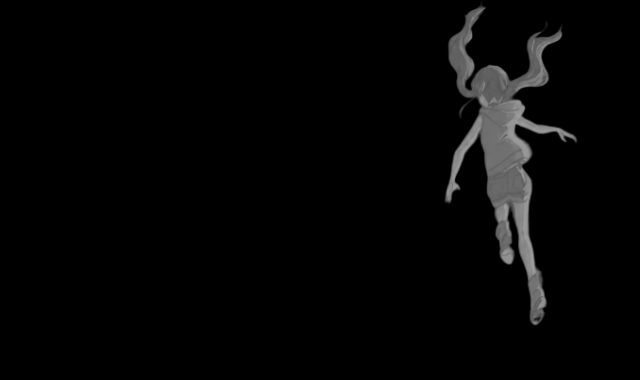

In [15]:
difference_single_channel = compute_difference(ini_bg_img, obj_img)
print(difference_single_channel)
print(difference_single_channel.shape)
cv2_imshow(difference_single_channel)

In [26]:
def compute_binary_mask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0) # Why 15??? how to choose the most optimized threshold? --> Otsu method and K-cluster method
    difference_binary = np.stack((difference_binary,) * 3, axis=-1)

    return difference_binary

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(380, 640, 3)


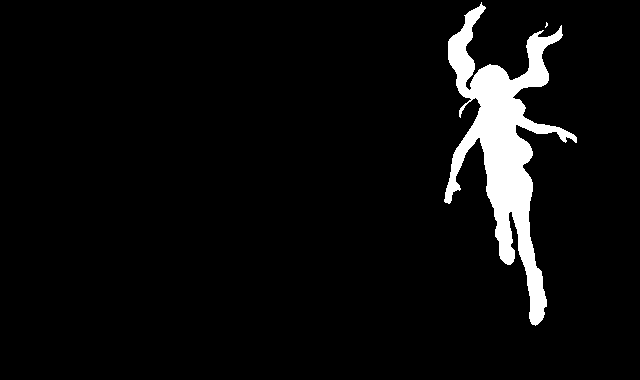

In [27]:
binary_mask = compute_binary_mask(difference_single_channel)
print(binary_mask)
print(binary_mask.shape)
cv2_imshow(binary_mask)

In [28]:
def replace_background(ini_bg_img, obj_img, new_bg_img):
  difference_single_channel = compute_difference(ini_bg_img, obj_img)
  binary_mask = compute_binary_mask(difference_single_channel)

  output = np.where(binary_mask == 255, obj_img, new_bg_img)

  return output

[[[113  65   1]
  [113  65   1]
  [113  65   1]
  ...
  [138  82   1]
  [138  82   1]
  [138  82   1]]

 [[113  65   1]
  [113  65   1]
  [113  65   1]
  ...
  [138  82   1]
  [138  82   1]
  [138  82   1]]

 [[114  66   2]
  [114  66   2]
  [114  66   2]
  ...
  [137  82   1]
  [137  82   1]
  [137  82   1]]

 ...

 [[ 37   9   2]
  [ 49   1   5]
  [ 25  24  30]
  ...
  [ 39  72 120]
  [ 10  35  77]
  [  0  13  49]]

 [[  4  24  48]
  [  6  20  50]
  [ 16  95 127]
  ...
  [ 58 184 239]
  [ 25 147 212]
  [  0 115 179]]

 [[ 33  77 119]
  [  2  16  64]
  [ 34 120 163]
  ...
  [ 45 140 227]
  [ 27 124 216]
  [  5 104 203]]]
(380, 640, 3)


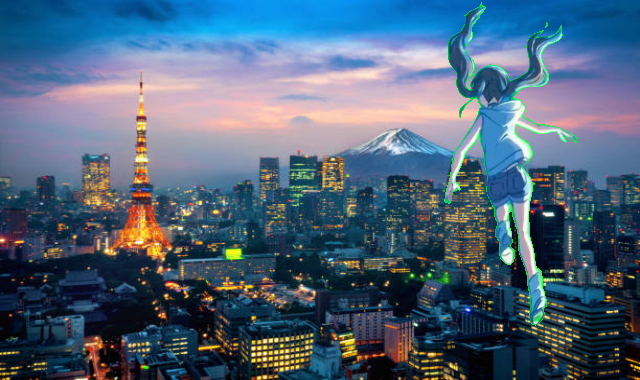

In [29]:
output = replace_background(ini_bg_img, obj_img, new_bg_img)
print(output)
print(output.shape)
cv2_imshow(output)